# Galaxies and the large-scale structure of the Universe

_A python exercise notebook written by Rita Tojeiro, October 2017. 
This notebook has benefited from examples provided by Britt Lundgren (University of North Carolina) and Jordan Raddick (John Hopkins University)_.

In this Notebook, you will use data from the Sloan Digital Sky Survey (SDSS), to explore the relationship between galaxy properties and the large-scale structure of the Universe. 

In the end, you should have found an answer to the following questions:

- How are galaxies spatially distributed in the Universe?
- Are galaxies all the same colour?
- Are galaxies all the same shape?
- How are galaxies' colours and shapes related to their spacial distribution?


## SDSS and SciServer

You will answer the above questions yourself, by exploring the largest astronomical dataset in the world - the Sloan Digital Sky Survey (www.sdss.org).

You will interact directly with the data using SciServer. SciServer is a cloud-based computing service, that allows users to query the SDSS database, store data in the cloud, and offers seamless integration with python programming tools via notebooks. In practice, this means that you can access and manipulate the largest astronomical dataset in the world, using only a web browser.

If you're reading this, you have already followed the instructions to get an account on SciServer, and have uploaded this notebook. This exercise has also assumed that you have completed the previous Notebook: **"Introduction to Python and SDSS spectroscopic data"**.

## This tutorial

This notebook guides you through your exploration of the SDSS data. You will be given a rough outline and some examples. As before, empty code cells will be provided for you complete the exercises. Always make sure you execute the code cells above an exercise before attempting to solve it.

At the end of your session, you will need to print out your notebook and attach it to your lab book. This will automatically print all of your code, plots and other outputs. To print, choose File->Print Preview. That will open another tab in your browser, with a print-friendly version of your notebook. **Make sure you have answered all exercises.**



### Imports

Firstly, we will import the necessary SciServer and support libraries. 

In [119]:
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
import SciServer.SkyServer as SkyServer   # show individual objects and generate thumbnail images through SkyServer
print('SciServer libraries imported')

# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')

import astroML
from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

SciServer libraries imported
Supporting libraries imported
Settings applied


## Querying the SDSS database

The SDSS data is stored in a SQL database. SQL is a languased used to communicate with databases via "queries". For each query command, the database returns an answer. Usually, this is a subsample of the original database, though SQL can operate on the data very effectively too. In this tutorial we will submit queries to the SDSS database to gather the information that we need, and we will use python to operate on, manipulate, and vizualise that data.

An extensive tutorial on how to query the SDSS database is provided here: http://skyserver.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx . In short, every SQL command consists of three blocks: 
- The **SELECT** block: it defines the quantities that you want your query to return.
- The **FROM** block: it defines which tables of the database you want SQL to look in.
- The **WHERE** block: it defines any constraints on the data that you want to impose.

In this Lab you won't have to write SQL queries from scratch, you will only need to modify existing queries.

### Using SQL and SciServer to return galaxy data

For the database schema and documentation see http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx The following query returns specific information on 16 galaxies, as a dataframe.


In [120]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
#
# Query the Sloan Digital Sky Serveys' Data Release 14.
# For the database schema and documentation see http://skyserver.sdss.org/dr14
#
# This query finds "a 4x4 grid of nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
# 
# First, store the query in an object called "query"
query="""
SELECT top 16 p.objId,p.ra,p.dec,p.petror90_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.petror90_r > 10
  and p.ra between 100 and 250
"""
gals = CasJobs.executeQuery(query, "dr14")
gals

Exception: Error when executing query. Http Response from CasJobs API returned status code 401:
{"Error Code":401,"Error Type":"Unauthorized","Error Message":"Authentication failed: Response status code does not indicate success: 500 (Internal Server Error).","LogMessageID":"b8d1f61f-5f44-48c9-9ae0-070e793eb5d5"}

### Exercise 1:
Use the link above to find out the meaning and the units (when applicable) of each variable returned by the following query. You might need to google or ask your demonstrator for help on some of the more obscure ones!

Answer here:
- ra = 
- dec = 
- petror90_r = 
- dered_u, dered_g, dered_r, dered_i, dered_z = 
- z = 
- plate = 
- mjd = 
- fiberid = 

### Exercise 2:

Modify the above query to return ALL galaxies that pass the same criteria (instead of just 16), with the additional restrictions that:

- the redshift should be between 0.02 and 0.5.
- the g band magnitude should be less than 17.

**Make sure you name the returned dataframe as all_gals (instead of gals).**

How many galaxies does your query return?

In [121]:
#Answer here:

## The large scale structure of the Universe 

### Exercise 3:

1. Plot the positions of all galaxies usint plt.scatter(). Remember to add labels and a title to your plot. Given the large number of points, you might want to use marker='.' and s='1'.

2. What can you tell from the distribution of galaxies? Are they uniformly distributed on the sky?

3. Roughly what fraction of the sky does your data cover?

In [122]:
#Answer here:

Answer here:


Answer here:

### Exercise 4: 

Using the np.where() command, select galaxies in two narrow redshift slices:
- slice 1: 0.02 < z < 0.03 (green)
- slice 2: 0.03 < z < 0.04 (orange)

Make the same plot as above, but only using the galaxies in each slice using the suggested colour scheme (make one plot for each slice). Finally, make a third plot with galaxies from both redshift slices. Add axis labels, a title and an legend to each plot.


In [123]:
#Answer here:

In [124]:
#Answer here:

In [125]:
#Answer here:

### Exercise 5: 

Do you see more structure in the distribution of galaxies in each slice, when compared to your first plot that included all galaxies? 

What can you tell about the structure you see in the two different redshift slices?

Why couldn't you see it in your first plot?

Answer here:


## Galaxy colours

Next we will revisit galaxy colours. In the last Lab session you explored how the shape of the spectrum of a galaxy, and the redshift of the galaxy affect the observed colours. 

In this set of exercises we will focus on the first slice in redshift, which is very narrow, and you therefore know that all galaxies have a similar redshift. I.e., if galaxies in this redshift slice different colours, it ought to be because their spectra is different. 

### Exercise:
Make histograms of the distribution of galaxy colours, using a sensible range and number of bins to allow to examine whether the colours of galaxies are all very similar, or if there are different types of galaxies in your sample. Do you see the same trends using different colours (i.e., u-g and g-r)? It might help to plot all histograms side by side. Choose sensible x-axis ranges for each histogram.

In [126]:
#Answer here:


Answer here:

### Exercise:

Use np.percentile() to choose the 25% reddest and 25% bluest galaxies in a colour of your choice. Then plot their positions on the sky. Do both types of galaxies trace the large-scale structure in a similar way? What can you say about which galaxies preferencially sit on denser parts of the Universe, and which sit on less dense regions (we call this _environment_)? For this exercise it is recommended that you make two plots (one for the red galaxies, and one for the blue), but that you put them side by side to help you compare.

https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

In [88]:
#answer here:

In [127]:
#answer here:

By now you will have started developing an understanding of how galaxies in general are spacially distributed in the Universe and the shape of the cosmic web, and how galaxies' position on the cosmic web and their environment is related to their colour. Next, we will look at the **shape** of galaxies.

## Galaxy morphology

Galaxy morphology studies the shapes of galaxies. You will already have some understanding of how local galaxies look like, from your exploration of SDSS imaging in the first Lab session using the SDSS SkyServer Navigate Tool. 

Here, we will do a more systematic exploration of how galaxy shapes are related to other properties.

The next cell provides a bit of code that selects 16 **random** galaxies from your dataframe, and shows you their optical images.

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


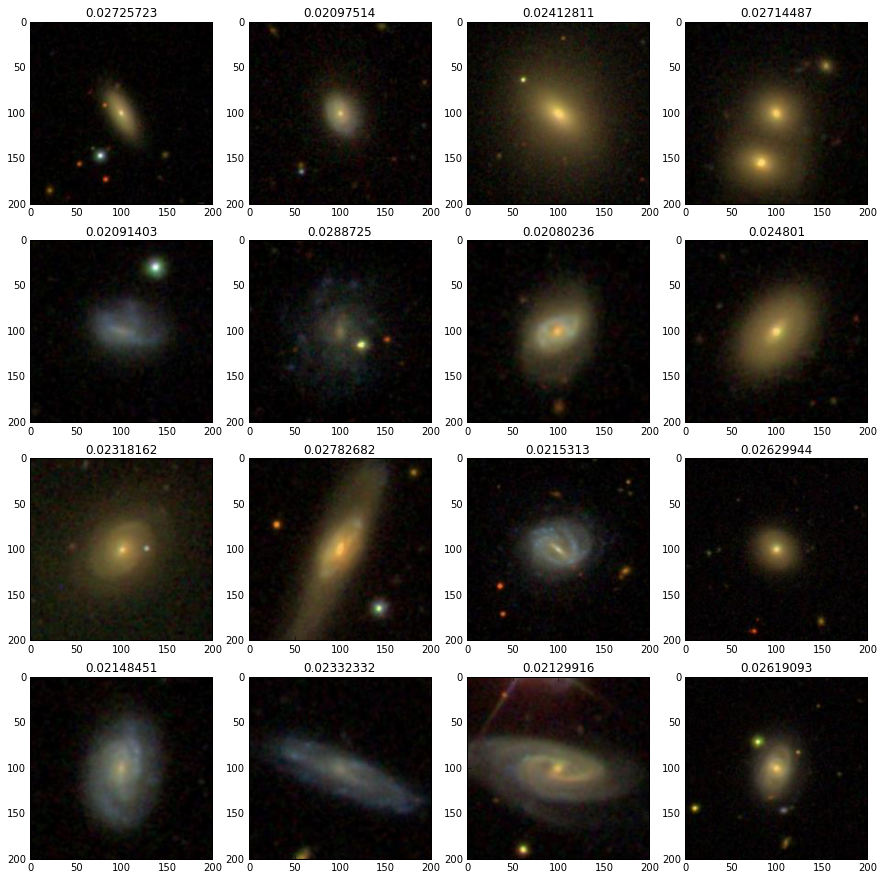

In [75]:
#plot a random subset of 16 galaxies
# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

#let's only look at the galaxies in our thin redshift slice
slice1 = np.where( (all_gals['z'] > 0.02) & (all_gals['z'] < 0.03))[0]

i = 0
nGalaxies = 16
ind = np.random.randint(0,len(slice1), nGalaxies)
count=0
for i in ind:           # iterate through the randomly selected rows in the DataFrame
    count=count+1
    print('Getting image '+str(count)+' of '+str(nGalaxies)+'...')
    if (count == nGalaxies):
        print('Plotting images...')
    scale=2*all_gals.loc[i]['petror90_r']/pixelsize/width
    img = SkyServer.getJpegImgCutout(ra=all_gals.loc[slice1[i]]['ra'], dec=all_gals.loc[slice1[i]]['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)                               # show images in grid
    plt.title(all_gals.loc[slice1[i]]['z'])     

### Exercise:
Compute the fraction of galaxies you'd classify as having disks or a spiral structure, and the fraction of galaxies you'd classify as being smooth. If you want to improve your statistics, you can rerun the cell above and you will get 16 different galaxies every time... (or, alternatively, you're allowed to look at the output from the people sitting around you. Classify their galaxies yourself, rather than taking their classifications!).

### Exercise:
Now using the code from the example above, do the same thing but taking 16 random galaxies that are **red**, according to your earlier definition of red and blue. Once again, classify the galaxies as spirals or smooth. 

In [128]:
# Answer here:

### Exercise:

Repeat the above exercise, now with blue galaxies. Repeat your classification exercise.

In [129]:
# Answer here:

### Exercise

From the above exercise, what can you say about the relationship between colour and morphology?

Answer here:

Finally, we will explore the **relationship between morphology and environment**. It is extraordinarily difficult to write a computer programme that determines whether a galaxy has spiral structure or is smooth. To this day, the human eye does better than the most sophisticated algorithms (the reason behind projects such as Galaxy Zoo - https://www.galaxyzoo.org). We will use a very simple proxy for morphology, which is good enough for our purposes: the sersic index. The sersic index tells us how rapidly the light profile of a galaxy is falling from the center, and essentially classifies galaxies' light profiles as being very centrally concentrated (like ellipticals), or as being flatter (like spirals). 

The cell below repeats our initial SQL query, but now it also returns the sersic profile, called sersic_n, and we are already limiting the redshift range to be between 0.02 and 0.03.

In [92]:
query="""
SELECT p.objId, p.ra,p.dec,p.petror90_r, p.expAB_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid, n.sersic_n
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
   JOIN nsatlas AS n ON n.mjd = s.mjd and n.fiberID = s.fiberID and n.plate = s.plate
WHERE p.petror90_r > 10
  and p.ra between 100 and 250
  and s.z between 0.02 and 0.03
  and p.g < 17
"""
all_gals = CasJobs.executeQuery(query, "dr14")
print(" Query returns " + str(len(all_gals))+ " galaxies")

 Query returns 7869 galaxies



Below is a histogram of the values of the sersic index in our sample. Let us call galaxies with a very high sersic index ellipticals (n > 4), and a very low sersic index spirals (n < 2).

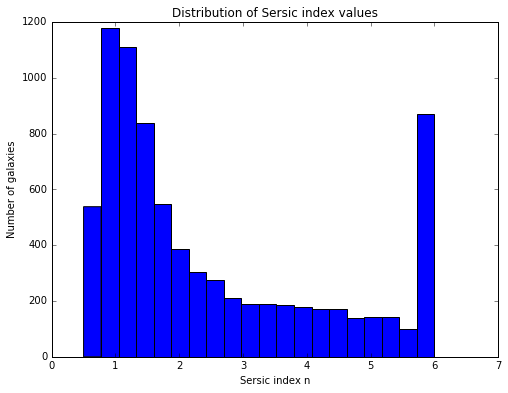

In [110]:
plt.figure(figsize=(8,6))
plt.hist(all_gals['sersic_n'], bins=20)
plt.xlabel('Sersic index n')
plt.ylabel('Number of galaxies')
plt.title('Distribution of Sersic index values')

### Exercise:

Look at the morphologies of high and low sersic index galaxies, like you did for blue and red. In your opinion, how good is this number at identifying morphology?

In [130]:
# Answer here:

In [131]:
# Answer here:

Answer here:

### Exercise:

Now plot the positions of low and high sersic index galaxies, side by side as you did for blue and red galaxies. In your opinion, do you have enough information to determine what property galaxy density influences the most (colour or morphology)? You are encouraged to experiment with different definitions of colour and morphology if you wish, or indeed make an argument as to why your exploration is insuffiencent to answer such a question. 

In [132]:
#answer here:

**Congratulations, that is the end of the Lab!** Make sure you've **run all the code cells, filled in all the text answers and that your plots are all showing without error**. **Print** out the notebook, and **attach it to your lab book**. This account on SciServer is yours to keep, and you're welcome to explore further at any time. If you do, and you ever need some guidance, I would be more than happy to help.